ML Assignment Que 2 (192CD009)

Importing Dataset

In [0]:
import numpy as np
import pandas as pd

In [0]:
dataset = pd.read_csv('/content/exams.csv')

In [413]:
dataset.shape

(1000, 8)

In [414]:
dataset.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,high school,free/reduced,none,78,74,69
1,male,group B,some high school,standard,none,68,62,67
2,male,group C,some high school,standard,completed,66,59,61
3,female,group D,some high school,free/reduced,completed,53,70,69
4,female,group C,high school,free/reduced,none,40,59,58


In [415]:
dataset.describe()

,math score,reading score,writing score
count,1000.000000,1000.00000,1000.000000
mean,66.403000,69.25500,68.201000
std,15.317154,14.77492,15.321271
min,7.000000,25.00000,24.000000
25%,56.000000,60.00000,58.000000
50%,68.000000,69.00000,68.000000
75%,77.250000,80.00000,79.000000
max,100.000000,100.00000,100.000000


In [416]:
dataset.groupby('race/ethnicity').size()

race/ethnicity
group A     76
group B    213
group C    329
group D    260
group E    122
dtype: int64

Separating Features and Target Label

In [0]:
feature_columns = ['math score','reading score','writing score','gender']

In [0]:
X = dataset[feature_columns].values
y = dataset['race/ethnicity'].values

Label Encoding

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()
y = le.fit_transform(y) #group A,B,C,D,E are encoded as 0,1,2,3,4
X[:,3] = le.fit_transform(X[:,3]) #label encoding male and female to 1 and 0

Traing Set , Cross Validation Set and Test set

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Data Visualisation

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
%matplotlib inline

Pairwise

<Figure size 432x288 with 0 Axes>

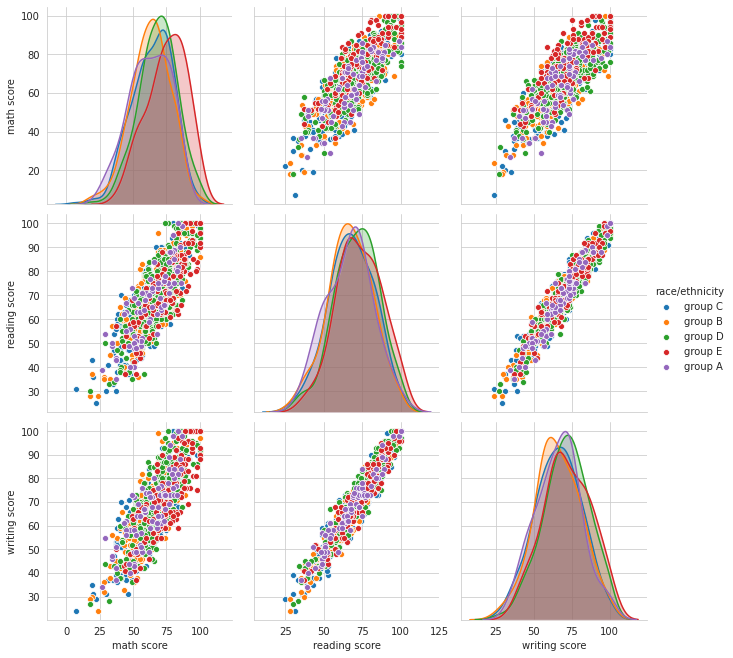

In [424]:
plt.figure()
sns.pairplot(dataset.drop(['parental level of education','lunch','test preparation course'],axis=1), hue = "race/ethnicity", height=3)
plt.show()

Using KNN for Classification(Supervised Learning)

Making Predicitons

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

#--learning model with k=3 ,k=5 and k=9--(first with 3)

classifier = KNeighborsClassifier(n_neighbors =3)
 
#--fitting the model--

classifier.fit(X_train,y_train)
 
#--predicting the Test set results--

y_pred = classifier.predict(X_test)


In [0]:
cm = confusion_matrix(y_test,y_pred)

In [427]:
cm

array([[ 3,  2,  4,  4,  1],
       [ 7, 16, 10,  8,  1],
       [11, 19, 22, 15,  1],
       [10, 18, 12, 13,  4],
       [ 3,  4,  5,  6,  1]])

Accuracy with k = 3

In [428]:
accuracy = accuracy_score(y_test,y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 27.5 %.


Finding out the best K (wrt MSE and Accuracy)

In [0]:
k_list = list(range(1,50,2))
cv_scores = []
cv_accuracies = []

In [0]:
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  scores = cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
  cv_scores.append(scores.mean())
  accuracy = accuracy_score(y_test,y_pred)*100
  cv_accuracies.append(accuracy)

<Figure size 432x288 with 0 Axes>

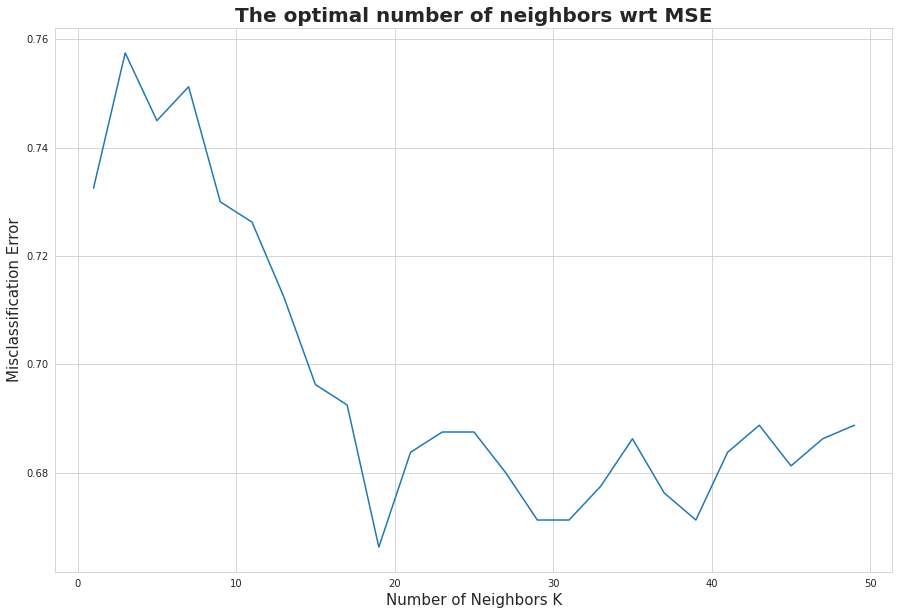

In [431]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors wrt MSE', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

<Figure size 432x288 with 0 Axes>

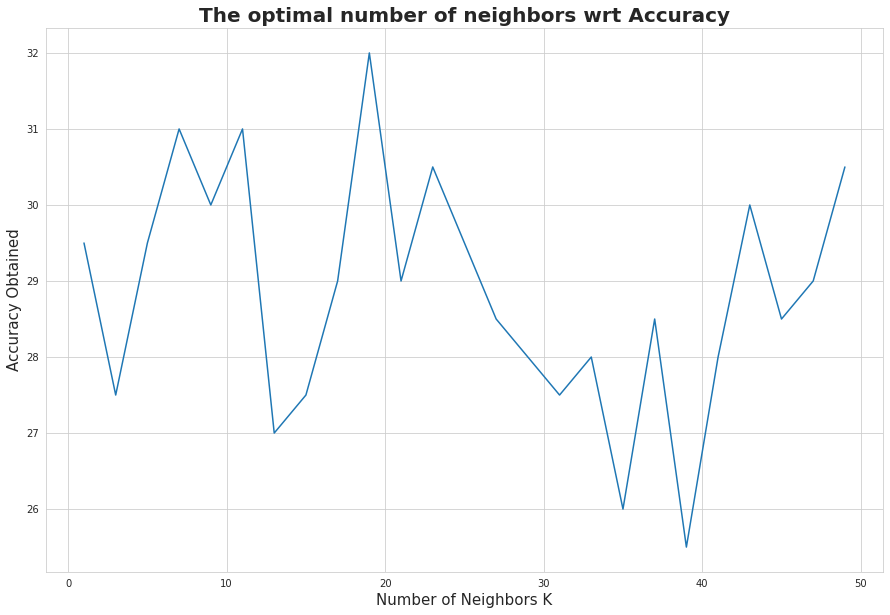

In [432]:
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors wrt Accuracy', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy Obtained', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, cv_accuracies)

plt.show()

From both plots it can be seen that k around 18 is best for our model

In [433]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 19.


So the optimal value of k is 19 and respective values of accuracy and mse are given below .

In [434]:
  knn = KNeighborsClassifier(n_neighbors=19)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)*100
  scores = cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
  print('Accuracy and MSE with k=19 are '+ str(accuracy) +'% and ' + str(round(scores.mean(),2)))

Accuracy and MSE with k=19 are 32.0% and 0.33


Now Predicting race/ethnicity on an example with our model (Gender = F, Math score = 45, Reading score =80, and Writing score = 76)


In [0]:
values2 = [45,80,76,0] #label encoded value 0 for female
X_test2 = [values2]
prediction = knn.predict(X_test2)

In [436]:
if prediction[0] == 0:
  print('Given test set belongs to group A')
elif prediction[0] == 1:
  print('Given test set belongs to group B')
elif prediction[0] == 2:
  print('Given test set belongs to group C')
elif prediction[0] == 3:
  print('Given test set belongs to group D')
elif prediction[0] == 4:
  print('Given test set belongs to group E')


Given test set belongs to group B
